# <font color=orange>**OpenCV ile Nesne Tespiti**</font>

## <font color=gold>**Özellik Eşleştirme**</font> <font color=gray>**(Feature Matching)**</font>

* Goruntu islemede nokta ozelligi eslesmesi, karmasik bir sahnede belirtilen bir hedefi tespit etmek icin etkili bir yontemdir.

* Bu yontem, birden cok nesne yerine tek nesneleri algilar.

* Orn, bu yontemi kullanarak, kisi daginik bir goruntu uzerinde belirli bir kisiyi taniyabilir ancak baska herhangi bir kisiyi taniyamaz.

* <font color=red>**Brute-Force**</font> eslestiricisi, bir goruntudeki bir ozelligin tanimlayicisini baska bir goruntunun diger tum ozellikleriyle eslestirir ve mesafeye gore eslesmeyi dondurur.

* Tum ozelliklerle eslesmeyi kontrol ettigi icin yavastir.

* <font color=red>**Olcek degismez ozellik donusumu**,</font> anahtar noktalari ilk olarak bir dizi referans goruntuden cikarilir ve saklanir.

* Yeni goruntudeki her bir ozelligi bu saklanan veri ile ayri ayri karsilastirarak ve oznitelik vektorlerinin Oklid mesafesine dayali olarak aday eslestirme ozelliklerini bularak yeni bir goruntude bir nesne taninir.

In [1]:
import cv2 
import matplotlib.pyplot as plt

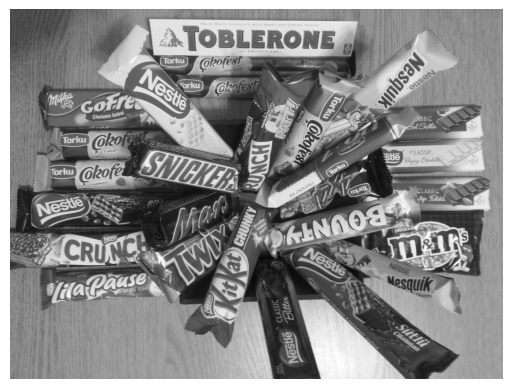

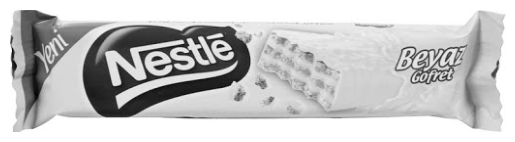

In [2]:
# Ana goruntu:
chos = cv2.imread('chocolates.jpg',0)
plt.figure(), plt.imshow(chos, cmap = 'gray'), plt.axis('off')

# Aranacak olan goruntu:
cho = cv2.imread('nestle.jpg',0)
plt.figure(), plt.imshow(cho, cmap = 'gray'), plt.axis('off');

In [3]:
# orb tanimlayici
# kose-kenar gibi nesneye ait ozellikler
orb = cv2.ORB_create()

# anahtar nokta tespiti
kp1, des1 = orb.detectAndCompute(cho, None)
kp2, des2 = orb.detectAndCompute(chos, None)

In [4]:
#bf matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# noktalari eslestir
matches = bf.match(des1,des2)

# mesafeye gore sirala
matches = sorted(matches, key = lambda x: x.distance)

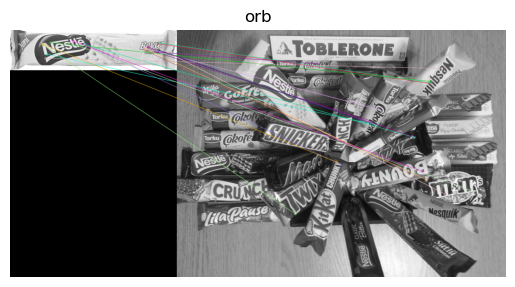

In [5]:
#eslesen resimleri gorsellestirme:
plt.figure()
img_match = cv2.drawMatches(cho, kp1, chos, kp2, matches[:20], None, flags = 2)
plt.imshow(img_match), plt.axis('off'), plt.title('orb');

In [6]:
#sift

sift = cv2.xfeatures2d.SIFT_create()

In [7]:
#bf

bf = cv2.BFMatcher()

In [8]:
# Anahtar noktatespiti sift ile:

kp1, des1 = sift.detectAndCompute(cho, None)
kp2, des2 = sift.detectAndCompute(chos, None)

matches = bf.knnMatch(des1, des2, k = 2)

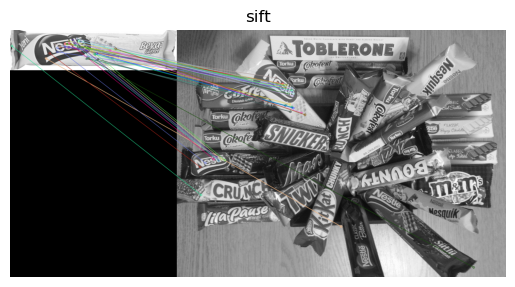

In [11]:
guzel_eslesme = []

for match1, match2  in matches:
    if match1.distance < 0.75*match2.distance:
        guzel_eslesme.append([match1])
        
plt.figure()
sift_matches = cv2.drawMatchesKnn(cho, kp1, chos, kp2, guzel_eslesme, None, flags = 2)
plt.imshow(sift_matches), plt.axis('off'), plt.title('sift');